In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
#read in already cleaned up data
dataset = pd.read_csv("../crimeData.csv", sep = "\t", header = 0)

In [9]:
#aggregate locations

#number of grids on x-axis (starting at 1)
resX = 200;
#number of grids on y-axis
resY = 200;

#identify the x,y edges of the data
x_max = dataset['X_COORD_CD'].max()
x_min = dataset['X_COORD_CD'].min()
y_max = dataset['Y_COORD_CD'].max()
y_min = dataset['Y_COORD_CD'].min()

xCoordinate = dataset['X_COORD_CD']
yCoordinate = dataset['Y_COORD_CD']

#distances along x and y axis
rangeX = x_max - x_min
rangeY = y_max - y_min

#linear transformations
kX = (resX-1)/rangeX
cX = x_min*kX -1
newX = round(kX * xCoordinate - cX)
kY = (resY-1)/rangeY
cY = y_min*kY -1
newY = round(kY * yCoordinate - cY)

newX = newX.astype(int)
newY = newY.astype(int)

dataset['New_X_Coor'] = newX
dataset['New_Y_Coor'] = newY

In [11]:

count  = np.zeros((resX, resY))
for i in range (0,len(newX)):
    x = newX[i] -1
    y = newY[i] -1
    count[x][y] = count[x][y] + 1
    


/home/zl/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


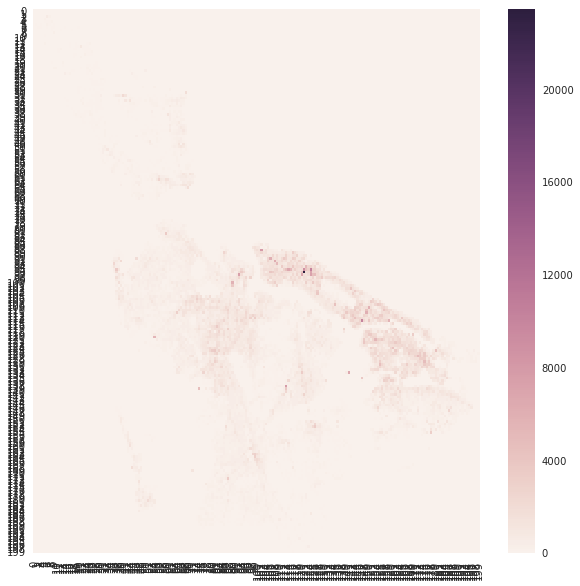

In [13]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(count)


In [24]:
def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize and len(copy)!= 0:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]

def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries

def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.iteritems():
		summaries[classValue] = summarize(instances)
	return summaries

def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.iteritems():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.iteritems():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions

def getAccuracy(testSet, predictions):
	correct = 0
	for i in range(len(testSet)):
		if testSet[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

def main():
	splitRatio = 0.67

	trainingSet, testSet = splitDataset(dataset, splitRatio)
	print('Split {0} rows into train={1} and test={2} rows').format(len(dataset), len(trainingSet), len(testSet))
	# prepare model
	summaries = summarizeByClass(trainingSet)
	# test model
	predictions = getPredictions(summaries, testSet)
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: {0}%').format(accuracy)
    
main()

Split {0} rows into train={1} and test={2} rows


AttributeError: 'NoneType' object has no attribute 'format'